![](https://github.com/DavidSArbelaez/Parcial_MetricasRendimiento/blob/main/img/logo.png?raw=1)

# 2do Parcial: Análisis Exploratorio de Datos. 

### Nombre de los Estudiantes:
    * David Steven Arbeláez Chávez
    * David Rodriguez
### Cédula de Ciudadanía:  
    * 1000 253 275
# Objetivo:

En este cuaderno se busca realizar una serie de ejercicios

---

Se obtiene el dataframe y las imagenes del [repositorio](https://github.com/DavidSArbelaez/Parcial_MetricasRendimiento) de github

# Modelo **02**

### Descripción de Valores:

    join_date: fecha año-mes-dia hora:minuto:segundo.
    group: houston machine learning, houstonr, houston data science,
           houston energy data science, houston data visualization.
    city:  Houston, Katy, Orizaba, Spring, Cold Spring Harbor,
           Kenmore, Sugar Land, Colorado Springs, Pearland, Austin, ....
    state: TX, NY, WA, CO, MD, CA, LA, GA, MO, NC, FL, NH,
           MA, PA, KY, NE, IL, MN, TN, IN, OH, F2, NJ, NS, 
           VA, MI, 18, AR, AL, OR, DE, 17, ON, SC, BC, V5,
           WI, AB, DC, AK, UT, OK, AZ, MS, CT, IA.
    country: us, mx, il, be, cn, jp, gr, in, fr, my, de,
             ye, np, no, au, gb, dz, co, tw, br, ie, pk,
             ca, hk, nl, ng, ae, sg, eg, ir, es, nz, se,
             za, cz, th, ch, by, pe, fi, kr, si, ph.
         
    

## 0.- Bibliotecas y Lectura del dataframe

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import get_dummies

Se importa el data frame `meetup_groups `

In [ ]:
df_meetup = pd.read_csv("https://raw.githubusercontent.com/DavidSArbelaez/Parcial_MetricasRendimiento/main/data/meetup_groups.csv")

## 1.- Identificación de datos perdidos (NaN)
    - Bonus --> ¿Cuantas Filas se han eliminado después de la limpieza?

### **Se identifica las columnas del dataframe**

In [ ]:
df_meetup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7671 entries, 0 to 7670
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   join_date  7671 non-null   object
 1   group      7671 non-null   object
 2   city       7671 non-null   object
 3   state      7527 non-null   object
 4   country    7671 non-null   object
dtypes: object(5)
memory usage: 299.8+ KB


Se suma los nulos para poder identificar cuantos hay y en que columna estan

In [ ]:
df_meetup.isnull().sum()

join_date      0
group          0
city           0
state        144
country        0
dtype: int64

Tras realizar esta consulta de los datos nnulos y tras revisar la información del data frame se puede afirmar el conjunto de datos tiene **datos Perdidos** en la columna `state` cuenta que con menos datos (los cuales fueron remplazados por datos nulos) que el resto de columnas, 144 datos menos.

Por lo que se va a quitar ese numero de columnas del resto de las columnas

In [ ]:
#Se eliminan los datos nulos
df_meetup = df_meetup.dropna()

#Se verfica la informacion
df_meetup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7527 entries, 0 to 7670
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   join_date  7527 non-null   object
 1   group      7527 non-null   object
 2   city       7527 non-null   object
 3   state      7527 non-null   object
 4   country    7527 non-null   object
dtypes: object(5)
memory usage: 352.8+ KB


In [ ]:
#Se verifica que se hayan quitado los datos nulos
df_meetup.isnull().sum()

join_date    0
group        0
city         0
state        0
country      0
dtype: int64

### Bonus

Se eliminaron 144 filas, debido a los datos nulos en la columna `state`

## Punto 2 al 4
    - 2. ¿Cuantas reuniones por grupo se registraron en el DataFrame? 
    - 3. Haga un gráfico (Pastel) de reuniones por grupo en el DataFrame
    - 4. Presente brevemente al menos 5 conclusiones del gráfico del punto 3. 

<img src="https://github.com/DavidSArbelaez/Parcial_MetricasRendimiento/blob/main/img/grupos-meetings.png?raw=1" style="width:250px">

### 2ndo punto

In [ ]:
df_meetup.groupby('group').size()

group
houston data science            2150
houston data visualization      1709
houston energy data science     1891
houston machine learning         740
houstonr                        1037
dtype: int64



Se identifica que hubieron estas cantidades de reuniones en el dataframe :
- 2150 reuniones de `houston data science`
- 1709 reuniones de `houston data visualization `
- 1891 reuniones de `houston energy data science `
- 740 reuniones de `houston machine learning`
- 1037 reuniones de `houstonr`

### Tercer punto

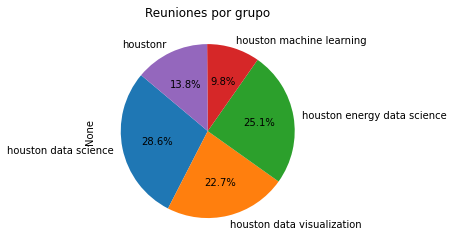

In [ ]:
df_meetup.groupby('group').size().plot(y=df_meetup['group'].unique(),kind='pie',startangle=140,autopct='%1.1f%%', title='Reuniones por grupo')
plt.show()

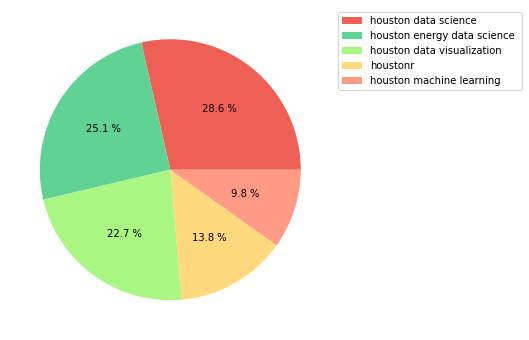

In [ ]:
gr = df_meetup['group']
gr_circular = df_meetup['group'].value_counts()

plt.figure(figsize=(15,6))
labels = gr_circular.keys()
colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
plt.pie(gr_circular,  autopct="%0.1f %%", colors=colores)
plt.legend(labels, bbox_to_anchor =(1, 1)) #especificamos la leyenda
plt.show()

### Cuarto punto

#Conclusiones sobre el grafico

- Se realizaron mas reuniones en el grupo de `houston data science` con un 28.6% sobre el total de reuniones
- El grupo de `houston machine learning` fue en el que se realizaron menos reuniones con un 9.8%
- La sumatoria de todos los procentajes dan el 100%, lo que nos asegura que se realizo bien el proceso
- Los grupos `houston energy data science` y `houston data visualization` tienen una cantidad muy parecida de datos
- EL grupo `houstonr` tiene la cantidad casi mas pequeña de reuniones

##Quinto punto

####5.- ¿Cuántas reuniones presenta el grupo `houston machine learning` en el dataset 

####Son 740 reuniones

## 6.-  ¿Cuál es la proporción de reuniones en la ciudad Houston?

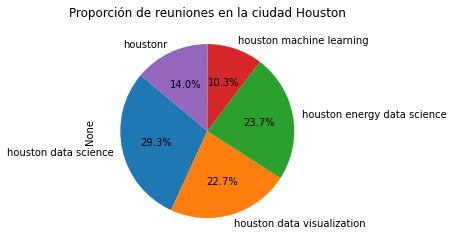

In [ ]:
filtro = (df_meetup['city']=="Houston")
df_meetup[filtro].groupby('group').size().plot(
    y=df_meetup['group'].unique(),kind='pie',startangle=140,autopct='%1.1f%%', 
    title='Proporción de reuniones en la ciudad Houston')
plt.show()

La ciudad de Houston tiene la siguiente proporción para cada grupo de reunión:
- 1628 reuniones de `houston data science` y tiene un 29.3% del total de reuniones del dataframe
- 1264 reuniones de `houston data visualization ` y tiene un 22.7%
- 1320 reuniones de `houston energy data science `y tiene un 23.7%
- 572 reuniones de `houston machine learning` y tiene un 10.3%
- 776 reuniones de `houstonr` y tiene un 14%

## 7.- Cuáles son las 10 ciudades más usadas en USA para reuniones de los grupos:
    - 'houston machine learning ' y 'houstonr'

In [ ]:
filtro = ((df_meetup['group']=="houston machine learning") | (df_meetup['group']=="houstonr")) & (df_meetup['country']=='us')
df_max=df_meetup[filtro].groupby('city').size().sort_values(ascending=False)
df_max.head(10)

city
Houston          1348
Katy               49
Spring             42
Sugar Land         32
Austin             25
Cypress            21
Pearland           16
Humble             14
League City        11
San Francisco      11
dtype: int64

Las 10 ciudades mas usadas en USA para reuniones de los grupos `houston machine learning` y `houstonr` son:
- `Houston` con una cantidad de **1348** reuniones
- `Katy` con una cantidad de **49** reuniones
- `Spring` con una cantidad de **42** reuniones
- `Sugar Land` con una cantidad de **32** reuniones
- `Austin` con una cantidad de **25** reuniones
- `Cypress` con una cantidad de **21** reuniones
- `Pearland` con una cantidad de **16** reuniones
- `Humble` con una cantidad de **14** reuniones
- `San Francisco` con una cantidad de **11** reuniones
- `League City` con una cantidad de **11** reuniones

## 8.- Cuáles son las ciudades más usadas para reuniones fuera del USA por:
    -  'houston machine learning' y 'houstonr'

In [ ]:
filtro = ((df_meetup['group']=="houston machine learning") | (df_meetup['group']=="houstonr")) & (df_meetup['country']!='us')
df_max=df_meetup[filtro].groupby('city').size().sort_values(ascending=False)
df_max

city
London         2
Manchester     1
Mississauga    1
Winchester     1
dtype: int64

Las ciudades mas usadas por fuera de USA para reuniones de los grupos `houston machine learning` y `houstonr` son:
- `London` con una cantidad de **2** reuniones
- `Manchester` con una cantidad de **1** reuniones
- `Mississauga` con una cantidad de **1** reuniones
- `Winchester` con una cantidad de **1** reuniones

## 9.- El  grupo 'houston data visualization' cuando hace reuniones en USA:
    - ¿Es cierto que la segunda ciudad en donde hacen más reuniones es Austin?

In [ ]:
houston=df_meetup.groupby('group').size().index[1]
filtro = ((df_meetup['group']==houston)) & (df_meetup['country']=='us')
df_max=df_meetup[filtro].groupby('city').size().sort_values(ascending=False)
df_max

city
Houston        1264
Spring           53
Sugar Land       36
Katy             35
Austin           27
               ... 
Galena Park       1
Gainesville       1
Franklin          1
Fort Worth        1
Winnetka          1
Length: 116, dtype: int64

La segunda ciudad que tiene mas reuniones de `houston data visualization`  es **Spring** y no **Austin**, que es la cuarta

## 10. - Agregar columna `month` y `year` 
  - Analisis exploratorio de datos agregando columna de año y mes.

###Creacion de columna año y mes

In [ ]:
# La columna 'join_date' estaba de tipo 'object', entonces se cambia a tipo 'datatime' (fecha) para luego crear las columnas correspondientes de year y month.
df_meetup['join_date'] = pd.to_datetime(df_meetup['join_date'])
df_meetup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7527 entries, 0 to 7670
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   join_date  7527 non-null   datetime64[ns]
 1   group      7527 non-null   object        
 2   city       7527 non-null   object        
 3   state      7527 non-null   object        
 4   country    7527 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 352.8+ KB


In [ ]:
# Se crean las columnas 'year' y 'month' con respecto a la columna 'join_date' con las funciones de la libreria 'datetime' 
list_date = df_meetup['join_date']
df_meetup['year'] =  df_meetup['join_date'].dt.year
df_meetup['month'] = df_meetup['join_date'].dt.month 
df_meetup.head()

,join_date,group,city,state,country,year,month
0,2016-11-18 02:41:29,houston machine learning,Houston,TX,us,2016,11
1,2017-05-09 14:16:37,houston machine learning,Houston,TX,us,2017,5
2,2016-12-30 02:34:16,houston machine learning,Houston,TX,us,2016,12
3,2016-07-18 00:48:17,houston machine learning,Houston,TX,us,2016,7
4,2017-05-25 12:58:16,houston machine learning,Houston,TX,us,2017,5


## 11.- ¿Cuál fue el mes que más reuniones tuvo el grupo 'houstonr' en el año 2016?

<img src="https://github.com/DavidSArbelaez/Parcial_MetricasRendimiento/blob/main/img/graf02.png?raw=1">

In [ ]:
# Se establece un filtro para saber cual fue el mes que tuvo mas reuniones el grupo 'houstonr' en el año 2016.
# Con el metodo groupby se retorna el mes y el numero de reuniones que hubo en ese año. 
filtro = ((df_meetup['group']=="houstonr") & (df_meetup['year']==2016))
df_meetup[filtro].groupby('month').size()

month
1     30
2     43
3     29
4     21
5     21
6     29
7     15
8     28
9     28
10    84
11    32
12    17
dtype: int64

Con base a los datos, se concluye que en el año 2016 el grupo 'houstonr' registró  mayor numero de reuniones en el mes de octubre con respecto a los otros meses.

## 12.- ¿Cuantas reuniones por año se registraron en el DataFrame?

In [ ]:
# Reuniones por año segun el dataframe
df_meetup.groupby('year').size()

year
2010      19
2011      29
2012      44
2013      78
2014     349
2015    1310
2016    2679
2017    3019
dtype: int64

## 13.- ¿Cuantas veces por año se han reunido los grupos ('houston data science', 'houston machine learning') fuera de USA en el dataframe?

In [ ]:
filtro = ((df_meetup['group']=="houston machine learning") | (df_meetup['group']=="houston data science") | (df_meetup['country']!="us"))
df_meetup[filtro].groupby('year').size()

year
2012       1
2014       2
2015       4
2016    1095
2017    1811
dtype: int64

##14.- ¿Cuales son los países en los que se hace reunión los grupos? 

In [ ]:
# Para saber cual es el nombre de los paises en los que hubo reuniones se utiliza el metodo unique(). 
df_meetup['country'].unique()

array(['us', 'gb', 'ca'], dtype=object)

Se concluyé que debido a que se eliminaron los valores nulos del dataframe, la mayoria de paises que estaban inicialmente en el dataset desaparecieron. Por esto se entiende que los paises en los que mas hubo reuniones fueron 'us' (Estados Unidos), 'gb' (Gran Bretaña) y 'ca' (canada).

##15.-¿Cuál es el promedio, desviación, el valor máximo y mínimo en el dataset?

In [ ]:
df_meetup.describe()

,year,month
count,7527.000000,7527.000000
mean,2016.045436,6.438820
std,1.064269,3.180995
min,2010.000000,1.000000
25%,2016.000000,4.000000
50%,2016.000000,7.000000
75%,2017.000000,9.000000
max,2017.000000,12.000000


* Se obtiene que el promedio de reuniones por año y mes fue de 2016.045 y 6.43 respectivamente.  

* Relativamente se obtiene una baja desviacion estandar, por año es de 1.06 y por mes es de 3.18. Esto hace referencia que la mayor parte de los datos (reuniones) siempre estuvieron agrupados cerca de su media.

##Conclusiones

* Se presento un data set para realizar un **EDA** y unas consultas sobre ese mimsmo dataframe.
* Se encontraron datos nulos en la columna `state` y se eliminaron las filas que rados en el pais contuvieran esos datos nulos.
* Se establecio que habian 5 grupos distintos en el dataframe.
* Todas las columnas del dataframe tienen datos categoricos menos la columna `join-date`
* Se agrego la columna `Year`y `month`para poder realizar un analisis temporal del dataframe
* Se obtiene que el promedio de reuniones por año y mes fue de 2016.045 y 6.43 respectivamente.  
* Se concluyé que debido a que se eliminaron los valores nulos del dataframe, la mayoria de paises que estaban inicialmente en el dataset desaparecieron. Por esto se entiende que los paises en los que mas hubo reuniones fueron 'us' (Estados Unidos), 'gb' (Gran Bretaña) y 'ca' (canada).
